In [1]:
#importing libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from sklearn import preprocessing

In [2]:
# Load the data files
demographics_df = pd.read_csv("raw_data/demographic.csv")
hospital_df = pd.read_csv("raw_data/hospital.csv")
physiological_df = pd.read_csv("raw_data/physiological.txt", delimiter="\t")

# Loading the severity.json file
with open("raw_data/severity.json", 'r') as file:
    severity_data = json.load(file)
severity_df = pd.json_normalize(severity_data)

# Checking the first few rows of the datasets
demographics_df.head(), hospital_df.head(), physiological_df.head(), severity_df.head()

(   pasient_id     alder   kjønn  utdanning     inntekt etnisitet
 0           2  60.33899  female       12.0    $11-$25k     white
 1           3  52.74698  female       12.0  under $11k     white
 2           4  42.38498  female       11.0  under $11k     white
 3           5  79.88495  female        NaN         NaN     white
 4           6  93.01599    male       14.0         NaN     white,
    pasient_id  sykehusdød  oppholdslengde
 0           2           1               4
 1           3           0              17
 2           4           0               3
 3           5           0             -99
 4           6           1               4,
    pasient_id  blodtrykk  hvite_blodlegemer  hjertefrekvens  \
 0           2       43.0          17.097656           112.0   
 1           3       70.0           8.500000            88.0   
 2           4       75.0           9.099609            88.0   
 3           5       59.0          13.500000           112.0   
 4           6      110.

In [3]:
# Replacing erroneous data (-99) with NaN in the hospital dataframe
hospital_df['oppholdslengde'].replace(-99, np.nan, inplace=True)

# Impute missing values for the demographic data using mode for categorical, median for continuous
demographics_df['utdanning'].fillna(demographics_df['utdanning'].median(), inplace=True)
demographics_df['inntekt'].fillna(demographics_df['inntekt'].mode()[0], inplace=True)

# Imputing missing values in physiological data using median for numerical columns
physiological_df.fillna(physiological_df.median(), inplace=True)

# Merging all datasets on "pasient_id"
merged_df = pd.merge(demographics_df, hospital_df, on='pasient_id')
merged_df = pd.merge(merged_df, physiological_df, on='pasient_id')
severity_flattened = severity_df.explode('pasient_id.0').rename(columns={'pasient_id.0': 'pasient_id'})
merged_df = pd.merge(merged_df, severity_flattened[['pasient_id', 'sykdomskategori.0']], on='pasient_id', how='left')


display(merged_df)

# Displaying the merged dataset
merged_df.head()

/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/714311525.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_df['oppholdslengde'].replace(-99, np.nan, inplace=True)
/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/714311525.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,...,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori.0
0,2,60.33899,female,12.0,$11-$25k,white,1,4.0,43.0,17.097656,...,98.000000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1963.0,NaN
1,3,52.74698,female,12.0,under $11k,white,0,17.0,70.0,8.500000,...,231.656250,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1963.0,NaN
2,4,42.38498,female,11.0,under $11k,white,0,3.0,75.0,9.099609,...,223.984375,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1963.0,NaN
3,5,79.88495,female,12.0,under $11k,white,0,NaN,59.0,13.500000,...,173.312500,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1963.0,ARF/MOSF
4,6,93.01599,male,14.0,under $11k,white,1,4.0,110.0,10.398438,...,266.625000,2.899902,0.899902,0.699951,140.0,7.659180,135.0,23.0,1963.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,9103,70.38196,male,12.0,under $11k,white,0,8.0,111.0,8.398438,...,180.000000,2.899902,0.399963,2.699707,139.0,7.379883,189.0,60.0,3900.0,ARF/MOSF
7738,9104,47.01999,male,13.0,under $11k,white,1,7.0,99.0,7.599609,...,428.562500,1.199951,0.399963,3.500000,135.0,7.469727,246.0,55.0,1963.0,ARF/MOSF
7739,9105,81.53894,female,8.0,$11-$25k,white,0,12.0,75.0,8.599609,...,230.406250,4.500000,0.599976,1.199951,137.0,7.289062,187.0,15.0,1963.0,ARF/MOSF
7740,59,72.55896,female,12.0,under $11k,white,1,4.0,123.0,13.298828,...,144.875000,2.899902,0.899902,0.500000,136.0,7.339844,135.0,23.0,1963.0,NaN


,pasient_id,alder,kjønn,utdanning,inntekt,etnisitet,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,...,lungefunksjon,serumalbumin,bilirubin,kreatinin,natrium,blod_ph,glukose,blodurea_nitrogen,urinmengde,sykdomskategori.0
0,2,60.33899,female,12.0,$11-$25k,white,1,4.0,43.0,17.097656,...,98.000000,2.899902,0.899902,5.500000,132.0,7.250000,135.0,23.0,1963.0,NaN
1,3,52.74698,female,12.0,under $11k,white,0,17.0,70.0,8.500000,...,231.656250,2.899902,2.199707,2.000000,134.0,7.459961,135.0,23.0,1963.0,NaN
2,4,42.38498,female,11.0,under $11k,white,0,3.0,75.0,9.099609,...,223.984375,2.899902,0.899902,0.799927,139.0,7.419922,135.0,23.0,1963.0,NaN
3,5,79.88495,female,12.0,under $11k,white,0,NaN,59.0,13.500000,...,173.312500,2.899902,0.899902,0.799927,143.0,7.509766,135.0,23.0,1963.0,ARF/MOSF
4,6,93.01599,male,14.0,under $11k,white,1,4.0,110.0,10.398438,...,266.625000,2.899902,0.899902,0.699951,140.0,7.659180,135.0,23.0,1963.0,NaN


In [4]:
merged_df['oppholdslengde'] = pd.to_numeric(merged_df['oppholdslengde'], errors='coerce')
merged_df['alder'] = pd.to_numeric(merged_df['alder'], errors='coerce')

# Ensure "kjønn" is treated as a categorical variable
merged_df['kjønn'] = merged_df['kjønn'].astype('category')

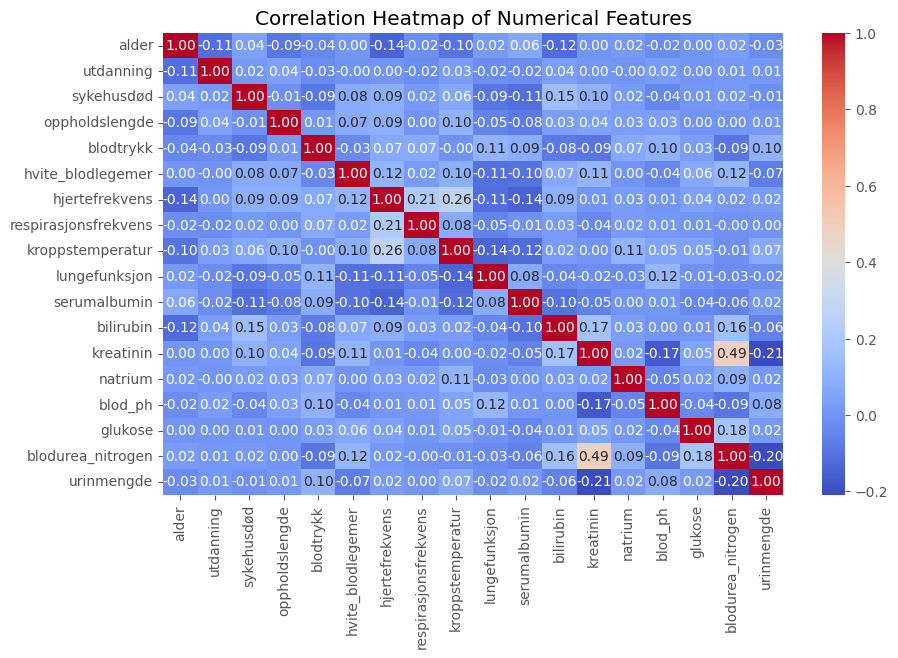

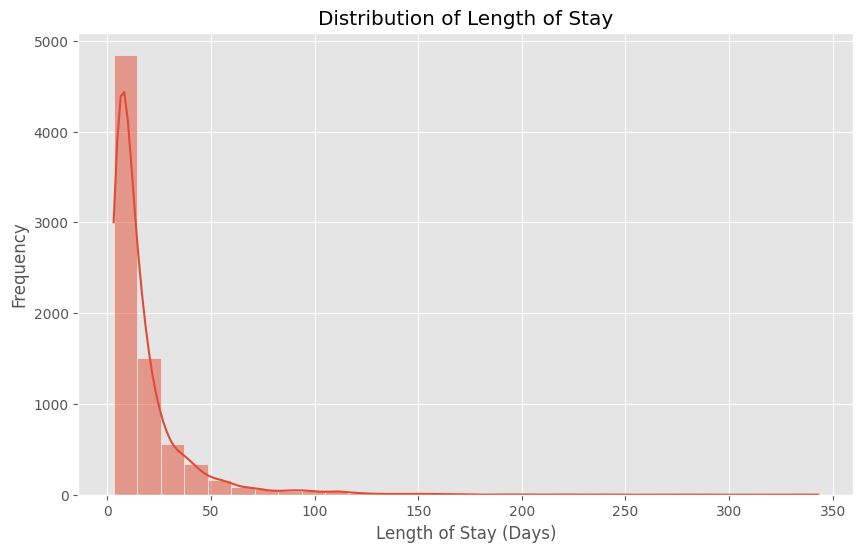

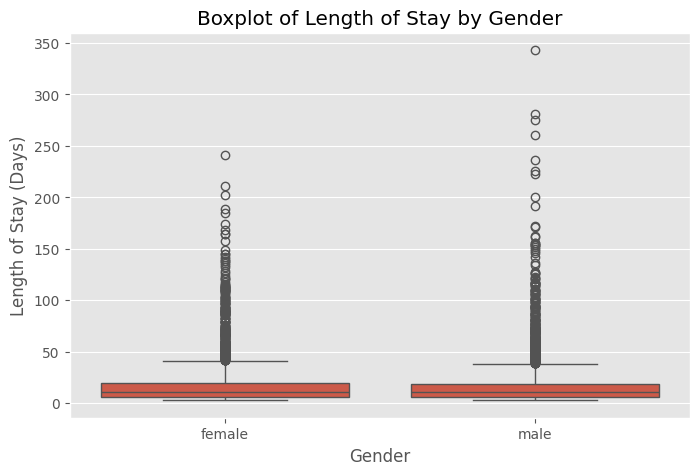

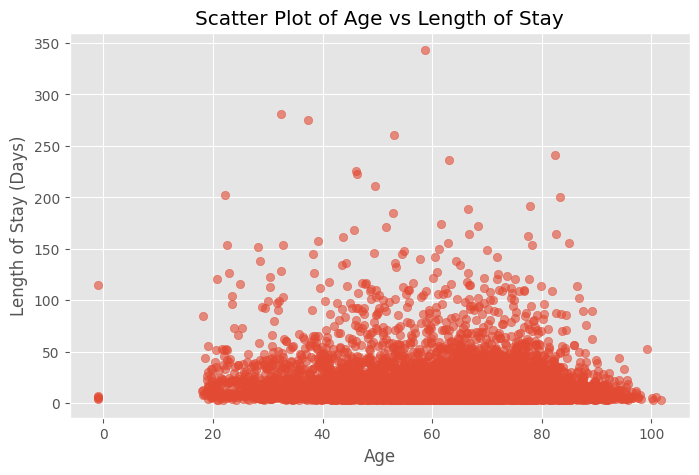

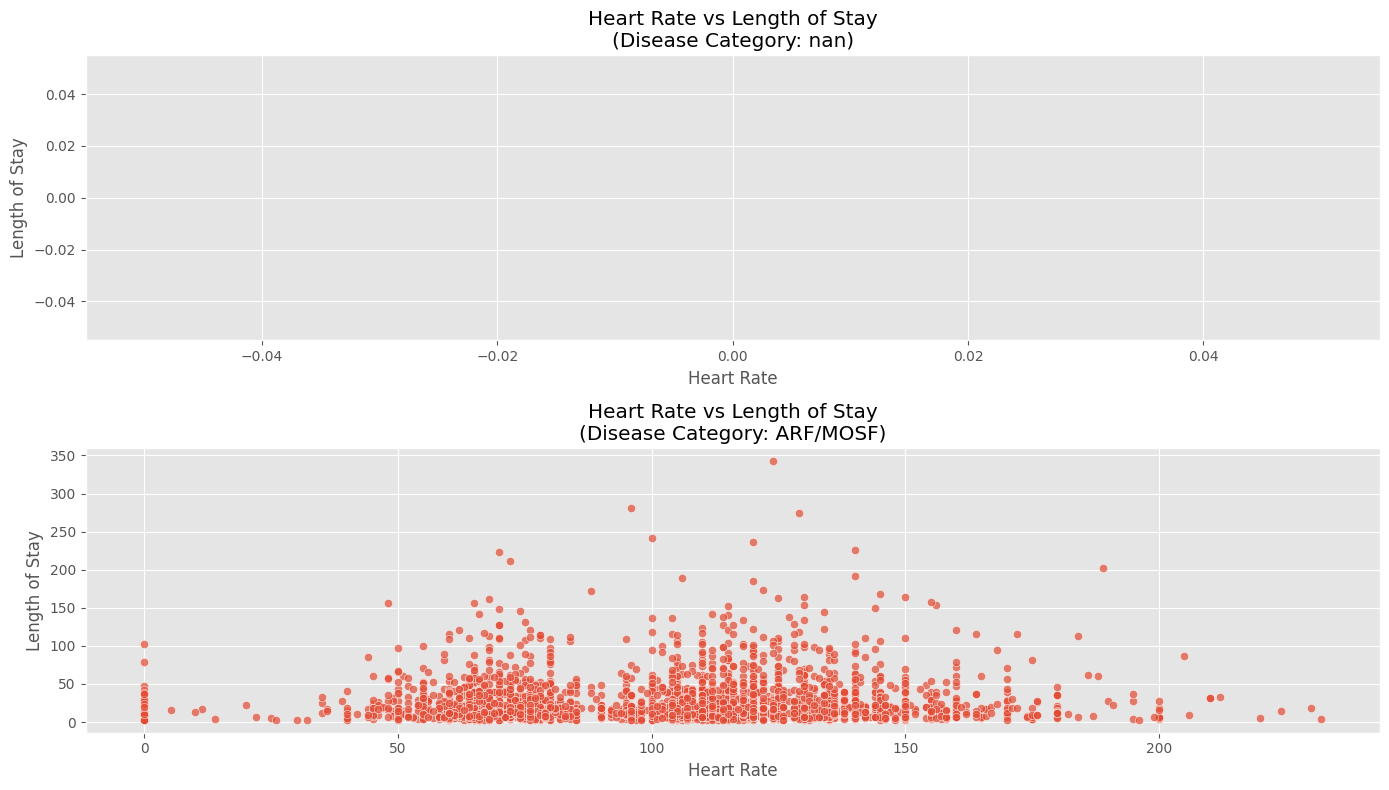

        pasient_id        alder kjønn    utdanning     inntekt etnisitet  \
count       7742.0  7742.000000  7742  7742.000000        7742      7705   
unique      7740.0          NaN     2          NaN           4         5   
top            4.0          NaN  male          NaN  under $11k     white   
freq           2.0          NaN  4370          NaN        4945      6120   
mean           NaN    62.710904   NaN    11.797081         NaN       NaN   
std            NaN    15.688113   NaN     3.136193         NaN       NaN   
min            NaN    -1.000000   NaN     0.000000         NaN       NaN   
25%            NaN    52.915240   NaN    11.000000         NaN       NaN   
50%            NaN    65.008000   NaN    12.000000         NaN       NaN   
75%            NaN    74.131487   NaN    12.000000         NaN       NaN   
max            NaN   101.847960   NaN    31.000000         NaN       NaN   

         sykehusdød  oppholdslengde    blodtrykk  hvite_blodlegemer  ...  \
count   774

In [5]:
# Setting up the visualization style
plt.style.use('ggplot')

# Correlation heatmap for numerical features
numerical_columns = merged_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Distribution of Length of Stay
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['oppholdslengde'].dropna(), kde=True, bins=30)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (Days)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Length of Stay by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='kjønn', y='oppholdslengde', data=merged_df)
plt.title('Boxplot of Length of Stay by Gender')
plt.xlabel('Gender')
plt.ylabel('Length of Stay (Days)')
plt.show()

# Scatter plot of Age vs Length of Stay
plt.figure(figsize=(8, 5))
plt.scatter(merged_df['alder'], merged_df['oppholdslengde'], alpha=0.6)
plt.title('Scatter Plot of Age vs Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay (Days)')
plt.show()

#scatter plots of heart rate vs. length of stay by disease category

# Set up the figure for multiple subplots
plt.figure(figsize=(14, 8))
disease_categories = merged_df['sykdomskategori.0'].unique()

# Plot for each disease category
for i, category in enumerate(disease_categories, 1):
    plt.subplot(2, (len(disease_categories) + 1) // 2, i)
    subset = merged_df[merged_df['sykdomskategori.0'] == category]
    sns.scatterplot(x='hjertefrekvens', y='oppholdslengde', data=subset, alpha=0.7)
    plt.title(f'Heart Rate vs Length of Stay\n(Disease Category: {category})')
    plt.xlabel('Heart Rate')
    plt.ylabel('Length of Stay')

plt.tight_layout()
plt.show()


#use describe() on the data set to show a statistical description of the variables.

print(merged_df.describe(include='all'))


Calculate correlations for heart rate and length of stay within each disease category, then test the significance of interaction terms with a regression model.

In [6]:
import statsmodels.api as sm

# One-hot encode disease category
disease_dummies = pd.get_dummies(merged_df['sykdomskategori.0'], prefix='disease')

# Multiply heart rate by each disease category dummy to create interaction terms
for col in disease_dummies.columns:
    merged_df[f'heart_rate_{col}'] = merged_df['hjertefrekvens'] * disease_dummies[col]

# Combine heart rate, disease dummies, and interaction terms for modeling
X = pd.concat([merged_df[['hjertefrekvens']], disease_dummies, merged_df.filter(regex='heart_rate_disease')], axis=1)
y = merged_df['oppholdslengde']

# Convert all columns in X to numeric to avoid ValueErrors
X = X.apply(pd.to_numeric, errors='coerce')

# Handle NaN values with median imputation
X = X.fillna(X.median())

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model with interaction terms
#interaction_model = sm.OLS(y, X).fit()

# Print the summary of the regression model
#print(interaction_model.summary())

In [7]:
print(merged_df)

     pasient_id     alder   kjønn  utdanning     inntekt etnisitet  \
0             2  60.33899  female       12.0    $11-$25k     white   
1             3  52.74698  female       12.0  under $11k     white   
2             4  42.38498  female       11.0  under $11k     white   
3             5  79.88495  female       12.0  under $11k     white   
4             6  93.01599    male       14.0  under $11k     white   
...         ...       ...     ...        ...         ...       ...   
7737       9103  70.38196    male       12.0  under $11k     white   
7738       9104  47.01999    male       13.0  under $11k     white   
7739       9105  81.53894  female        8.0    $11-$25k     white   
7740         59  72.55896  female       12.0  under $11k     white   
7741          4  42.38498  female       11.0  under $11k     white   

      sykehusdød  oppholdslengde  blodtrykk  hvite_blodlegemer  ...  \
0              1             4.0       43.0          17.097656  ...   
1              0 

In [8]:
# Feature Engineering

# Started with creating new features
# Age Grouping
bins = [0, 18, 40, 60, 80, 100]
labels = ['0-18', '19-40', '41-60', '61-80', '81-100']
merged_df['alder_gruppe'] = pd.cut(merged_df['alder'], bins=bins, labels=labels, right=False)


comorbidity_columns = ['sykdomskategori.0']  # Add more if available
merged_df['komorbiditet_antall'] = merged_df[comorbidity_columns].notnull().sum(axis=1)

# Encode Categorical Variables
# One-hot encoding gender, ethnicity, age group, and disease category
encoded_df = pd.get_dummies(merged_df, columns=['kjønn', 'etnisitet', 'alder_gruppe', 'sykdomskategori.0'], drop_first=True)

# 3. Feature Scaling
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = [
    'alder', 'utdanning', 'blodtrykk', 'hvite_blodlegemer', 'hjertefrekvens',
    'respirasjonsfrekvens', 'kroppstemperatur', 'lungefunksjon', 'serumalbumin',
    'bilirubin', 'kreatinin', 'natrium', 'blod_ph', 'glukose', 'blodurea_nitrogen', 'urinmengde'
]

# Standardizing numerical columns
scaler = StandardScaler()
encoded_df[numerical_cols] = scaler.fit_transform(encoded_df[numerical_cols])


display(encoded_df)


# Showing the first few rows of the transformed dataset
encoded_df.head()


,pasient_id,alder,utdanning,inntekt,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,...,komorbiditet_antall,kjønn_male,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,alder_gruppe_19-40,alder_gruppe_41-60,alder_gruppe_61-80,alder_gruppe_81-100
0,2,-0.151202,0.064707,$11-$25k,1,4.0,-1.494521,0.536774,0.467307,1.115261,...,0,False,False,False,False,True,False,False,True,False
1,3,-0.635167,0.064707,under $11k,0,17.0,-0.520215,-0.417843,-0.294753,0.486904,...,0,False,False,False,False,True,False,True,False,False
2,4,-1.295709,-0.254172,under $11k,0,3.0,-0.339788,-0.351267,-0.294753,0.905809,...,0,False,False,False,False,True,False,True,False,False
3,5,1.094788,0.064707,under $11k,0,NaN,-0.917155,0.137318,0.467307,-0.350904,...,1,False,False,False,False,True,False,False,True,False
4,6,1.931848,0.702464,under $11k,1,4.0,0.923200,-0.207055,0.118029,2.162521,...,0,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,9103,0.489004,0.064707,under $11k,0,8.0,0.959285,-0.429120,-0.453516,0.068000,...,1,True,False,False,False,True,False,False,True,False
7738,9104,-1.000243,0.383585,under $11k,1,7.0,0.526261,-0.517815,0.403802,0.068000,...,1,True,False,False,False,True,False,True,False,False
7739,9105,1.200224,-1.210807,$11-$25k,0,12.0,-0.339788,-0.406783,-0.898051,0.068000,...,1,False,False,False,False,True,False,False,False,True
7740,59,0.627781,0.064707,under $11k,1,4.0,1.392310,0.114981,0.022772,0.905809,...,0,False,False,False,False,True,False,False,True,False


,pasient_id,alder,utdanning,inntekt,sykehusdød,oppholdslengde,blodtrykk,hvite_blodlegemer,hjertefrekvens,respirasjonsfrekvens,...,komorbiditet_antall,kjønn_male,etnisitet_black,etnisitet_hispanic,etnisitet_other,etnisitet_white,alder_gruppe_19-40,alder_gruppe_41-60,alder_gruppe_61-80,alder_gruppe_81-100
0,2,-0.151202,0.064707,$11-$25k,1,4.0,-1.494521,0.536774,0.467307,1.115261,...,0,False,False,False,False,True,False,False,True,False
1,3,-0.635167,0.064707,under $11k,0,17.0,-0.520215,-0.417843,-0.294753,0.486904,...,0,False,False,False,False,True,False,True,False,False
2,4,-1.295709,-0.254172,under $11k,0,3.0,-0.339788,-0.351267,-0.294753,0.905809,...,0,False,False,False,False,True,False,True,False,False
3,5,1.094788,0.064707,under $11k,0,NaN,-0.917155,0.137318,0.467307,-0.350904,...,1,False,False,False,False,True,False,False,True,False
4,6,1.931848,0.702464,under $11k,1,4.0,0.923200,-0.207055,0.118029,2.162521,...,0,True,False,False,False,True,False,False,False,True


Encoding the 'inntekt' column using one-hot encoding


Since `encoded_df` already has other encoded columns, we need to ensure 'inntekt' is also encoded

In [9]:
encoded_df = pd.get_dummies(merged_df, columns=['inntekt'], drop_first=True)

# Verifying the transformation
encoded_df.head()
# Confirming that all columns are numerical
print(encoded_df.dtypes)

pasient_id                       object
alder                           float64
kjønn                          category
utdanning                       float64
etnisitet                        object
sykehusdød                        int64
oppholdslengde                  float64
blodtrykk                       float64
hvite_blodlegemer               float64
hjertefrekvens                  float64
respirasjonsfrekvens            float64
kroppstemperatur                float64
lungefunksjon                   float64
serumalbumin                    float64
bilirubin                       float64
kreatinin                       float64
natrium                         float64
blod_ph                         float64
glukose                         float64
blodurea_nitrogen               float64
urinmengde                      float64
sykdomskategori.0                object
heart_rate_disease_ARF/MOSF     float64
alder_gruppe                   category
komorbiditet_antall               int64


In [10]:
# Identify numerical and categorical columns
numerical_cols = encoded_df.select_dtypes(include=[np.number]).columns
categorical_cols = encoded_df.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with the median
encoded_df[numerical_cols] = encoded_df[numerical_cols].fillna(encoded_df[numerical_cols].median())

# Impute missing values in categorical columns with the mode
encoded_df[categorical_cols] = encoded_df[categorical_cols].fillna(encoded_df[categorical_cols].mode().iloc[0])

# Verify that there are no more missing values
missing_after_imputation = encoded_df.isnull().sum().sum()

# Displaying the result to confirm no missing values remain
print('Missing values after imputation:', missing_after_imputation)

Missing values after imputation: 9


/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/184005410.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df[categorical_cols] = encoded_df[categorical_cols].fillna(encoded_df[categorical_cols].mode().iloc[0])


In [11]:
missing_columns = encoded_df.columns[encoded_df.isnull().any()]
print(encoded_df[missing_columns].isnull().sum())

alder_gruppe    9
dtype: int64


In [12]:
print(encoded_df.dtypes)
encoded_df = pd.get_dummies(encoded_df, drop_first=True)
print(encoded_df.dtypes)

pasient_id                        int64
alder                           float64
kjønn                          category
utdanning                       float64
etnisitet                        object
sykehusdød                        int64
oppholdslengde                  float64
blodtrykk                       float64
hvite_blodlegemer               float64
hjertefrekvens                  float64
respirasjonsfrekvens            float64
kroppstemperatur                float64
lungefunksjon                   float64
serumalbumin                    float64
bilirubin                       float64
kreatinin                       float64
natrium                         float64
blod_ph                         float64
glukose                         float64
blodurea_nitrogen               float64
urinmengde                      float64
sykdomskategori.0                object
heart_rate_disease_ARF/MOSF     float64
alder_gruppe                   category
komorbiditet_antall               int64


After merging and encoding, I check for highly correlated features or redundant columns. Removing those can improve interpretability and reduce noise in the model.

In [13]:
# Compute the correlation matrix for the numerical features
correlation_matrix = encoded_df.corr()

# Set a threshold for identifying highly correlated features
correlation_threshold = 0.85

# Find pairs of highly correlated features
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display the pairs of highly correlated features
print("Highly correlated feature pairs:")
for pair in high_corr_pairs:
    print(pair)

# Drop one feature from each pair to reduce redundancy
redundant_features = {pair[0] for pair in high_corr_pairs}  # Collect the first feature of each pair
encoded_df_reduced = encoded_df.drop(columns=redundant_features)

print(f"\nNumber of features before reduction: {encoded_df.shape[1]}")
print(f"Number of features after reduction: {encoded_df_reduced.shape[1]}")

Highly correlated feature pairs:
('komorbiditet_antall', 'heart_rate_disease_ARF/MOSF')

Number of features before reduction: 33
Number of features after reduction: 32


### Split the data into training, test, validation sets

In [14]:
from sklearn.model_selection import train_test_split

# Define the target variable and features
X = encoded_df.drop(['oppholdslengde'], axis=1)  # Features (excluding the target variable)
y = encoded_df['oppholdslengde']  # Target variable (length of stay)

# Split the data into 70% training+validation and 30% test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the 70% training+validation set into 75% training (52.5% of original) and 25% validation (17.5% of original)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2143, random_state=42)

#The second split divides the training+validation set into 75% training (52.5% of the total dataset) and 25% validation (17.5% of the total dataset).

# Display the sizes of the resulting datasets
(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

((4257, 32), (1162, 32), (2323, 32), (4257,), (1162,), (2323,))

/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/700828903.py:40: RuntimeWarning: invalid value encountered in sqrt
  std_cv_rmse = np.sqrt(-cv_scores.std())
/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/700828903.py:40: RuntimeWarning: invalid value encountered in sqrt
  std_cv_rmse = np.sqrt(-cv_scores.std())
/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/700828903.py:40: RuntimeWarning: invalid value encountered in sqrt
  std_cv_rmse = np.sqrt(-cv_scores.std())
/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/700828903.py:40: RuntimeWarning: invalid value encountered in sqrt
  std_cv_rmse = np.sqrt(-cv_scores.std())


Linear Regression:
  Validation RMSE: 22.847
  Test RMSE: 21.327
  Test MAE: 12.107
  Test R-squared: 0.102
  Cross-Validation Mean RMSE: 19.872
  Cross-Validation RMSE Std Dev: nan

Random Forest:
  Validation RMSE: 23.300
  Test RMSE: 21.869
  Test MAE: 12.699
  Test R-squared: 0.056
  Cross-Validation Mean RMSE: 20.653
  Cross-Validation RMSE Std Dev: nan

Gradient Boosting:
  Validation RMSE: 22.963
  Test RMSE: 21.373
  Test MAE: 12.065
  Test R-squared: 0.098
  Cross-Validation Mean RMSE: 20.154
  Cross-Validation RMSE Std Dev: nan

Support Vector Regression:
  Validation RMSE: 24.906
  Test RMSE: 23.523
  Test MAE: 11.472
  Test R-squared: -0.093
  Cross-Validation Mean RMSE: 21.683
  Cross-Validation RMSE Std Dev: nan

XGBoost:
  Validation RMSE: 23.870
  Test RMSE: 23.135
  Test MAE: 13.548
  Test R-squared: -0.057
  Cross-Validation Mean RMSE: 21.663
  Cross-Validation RMSE Std Dev: nan



/var/folders/2k/ybmt4k493c9_s0p74bsbpb700000gn/T/ipykernel_2792/700828903.py:40: RuntimeWarning: invalid value encountered in sqrt
  std_cv_rmse = np.sqrt(-cv_scores.std())


Best Gradient Boosting Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
Tuned Gradient Boosting Validation RMSE: 22.818595050811695
Tuned Gradient Boosting Test RMSE: 21.264576412629964
Tuned Gradient Boosting Test MAE: 11.970422892533511
Tuned Gradient Boosting Test R-squared: 0.10721110787865396


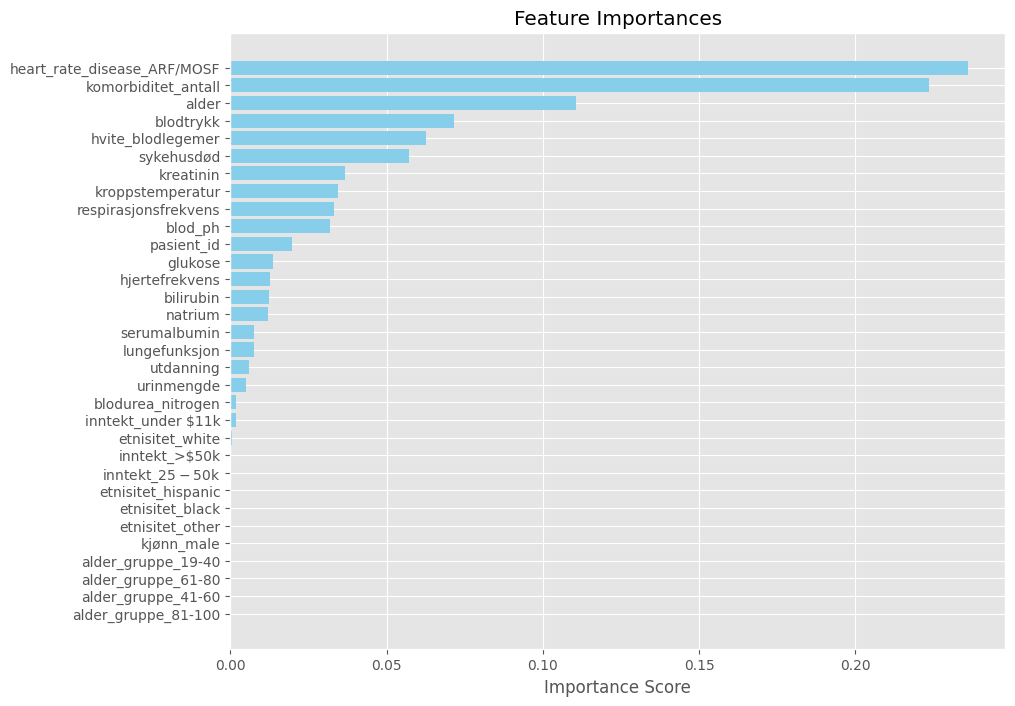

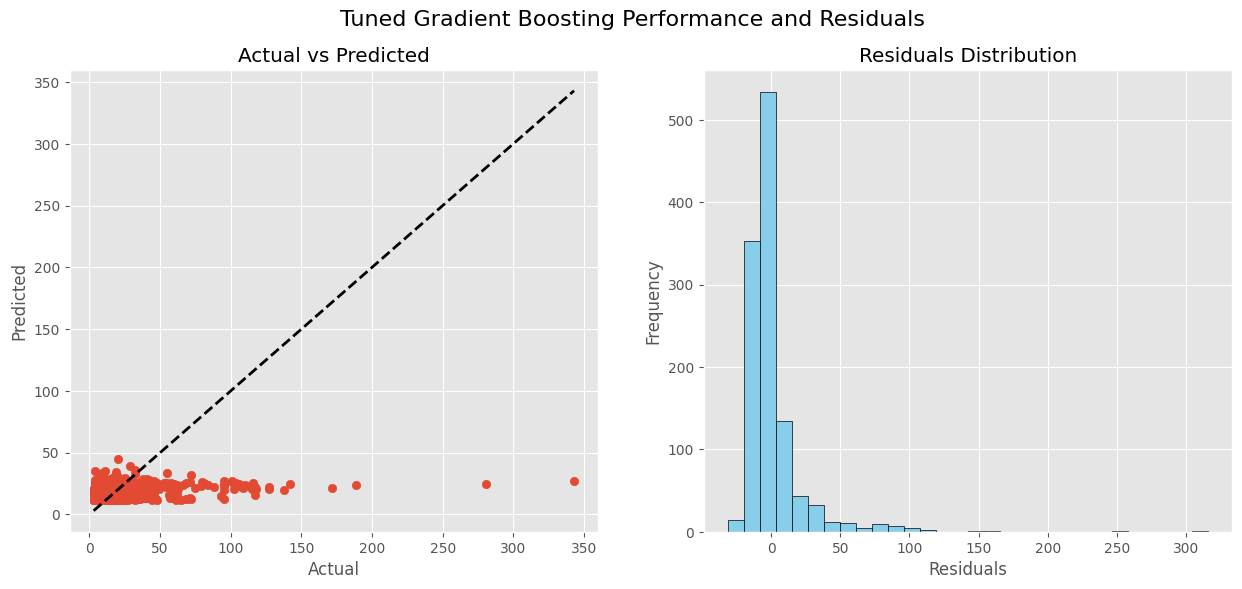

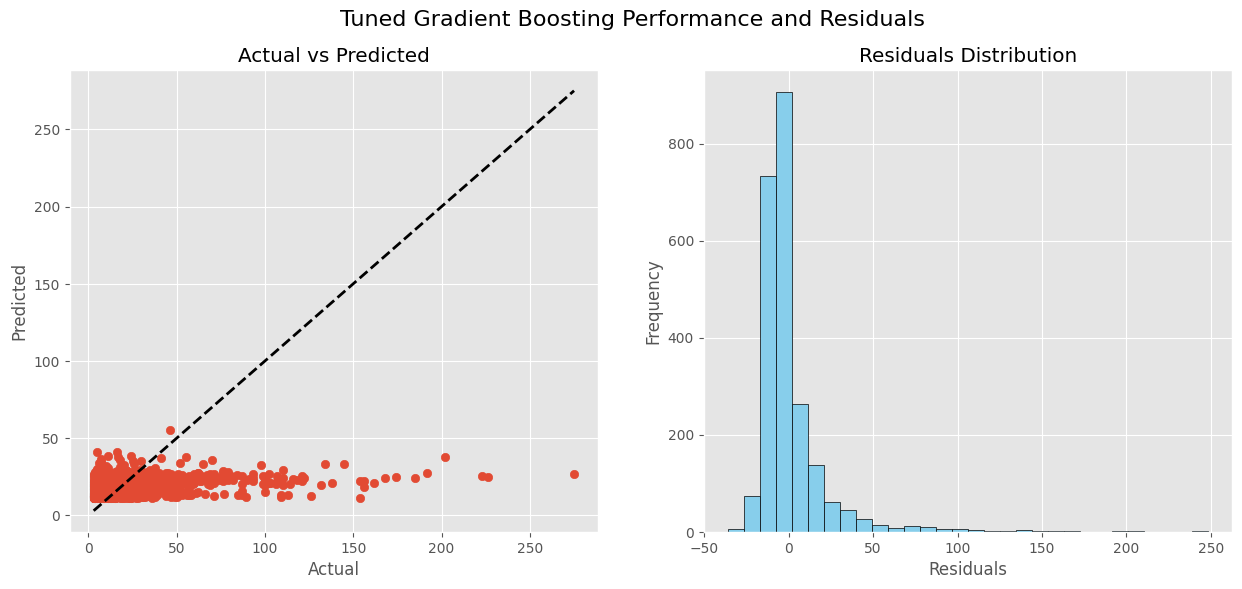

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import joblib


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1)
}

# Training, validation, and test evaluation
model_results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Validation predictions and evaluation
    y_val_pred = model.predict(X_val)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    mae_val = mean_absolute_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    # Test predictions and evaluation
    y_test_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_rmse = np.sqrt(-cv_scores.mean())
    std_cv_rmse = np.sqrt(-cv_scores.std())
    
    # Store results
    model_results[model_name] = {
        "Validation RMSE": rmse_val,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test,
        "Test R-squared": r2_test,
        "Cross-Validation Mean RMSE": mean_cv_rmse,
        "Cross-Validation RMSE Std Dev": std_cv_rmse
    }

# Display results
for model_name, results in model_results.items():
    print(f"{model_name}:\n" +
          f"  Validation RMSE: {results['Validation RMSE']:.3f}\n" +
          f"  Test RMSE: {results['Test RMSE']:.3f}\n" +
          f"  Test MAE: {results['Test MAE']:.3f}\n" +
          f"  Test R-squared: {results['Test R-squared']:.3f}\n" +
          f"  Cross-Validation Mean RMSE: {results['Cross-Validation Mean RMSE']:.3f}\n" +
          f"  Cross-Validation RMSE Std Dev: {results['Cross-Validation RMSE Std Dev']:.3f}\n")

# Hyperparameter tuning for Gradient Boosting (final model selection)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Perform grid search for Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Gradient Boosting Hyperparameters: {grid_search_gb.best_params_}")

# Evaluate tuned Gradient Boosting model
y_val_pred_gb = best_gb_model.predict(X_val)
rmse_val_gb = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
y_test_pred_gb = best_gb_model.predict(X_test)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

# Print tuned Gradient Boosting performance
print(f"Tuned Gradient Boosting Validation RMSE: {rmse_val_gb}")
print(f"Tuned Gradient Boosting Test RMSE: {rmse_test_gb}")
print(f"Tuned Gradient Boosting Test MAE: {mae_test_gb}")
print(f"Tuned Gradient Boosting Test R-squared: {r2_test_gb}")

# Save the final model for deployment 
joblib.dump(best_gb_model, 'gradient_boosting_model.pkl')

# Feature Importance for Gradient Boosting
if hasattr(best_gb_model, "feature_importances_"):
    feature_importances = best_gb_model.feature_importances_
    feature_names = X_train.columns
    sorted_idx = np.argsort(feature_importances)[::-1]
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], color="skyblue")
    plt.xlabel("Importance Score")
    plt.title("Feature Importances")
    plt.gca().invert_yaxis()  # Highest importance on top
    plt.show()

# Residual Analysis for the best model
def plot_model_performance(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'{model_name} Performance and Residuals', fontsize=16)
    
    # Actual vs. Predicted
    axes[0].scatter(y_true, y_pred)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    axes[0].set_title('Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    
    # Residuals Distribution
    axes[1].hist(residuals, bins=30, color='skyblue', edgecolor='black')
    axes[1].set_title('Residuals Distribution')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')
    
    plt.show()

# Plot performance and residuals for the best Gradient Boosting model on the validation set
plot_model_performance(y_val, y_val_pred_gb, "Tuned Gradient Boosting")

# Plot performance and residuals for the best Gradient Boosting model on the test set
plot_model_performance(y_test, y_test_pred_gb, "Tuned Gradient Boosting")


Validation Performance:
RMSE: 22.818595050811695
MAE: 12.107185598799749
R-squared: 0.08474373147008718
Test Performance:
RMSE: 21.264576412629964
MAE: 11.970422892533511
R-squared: 0.10721110787865396


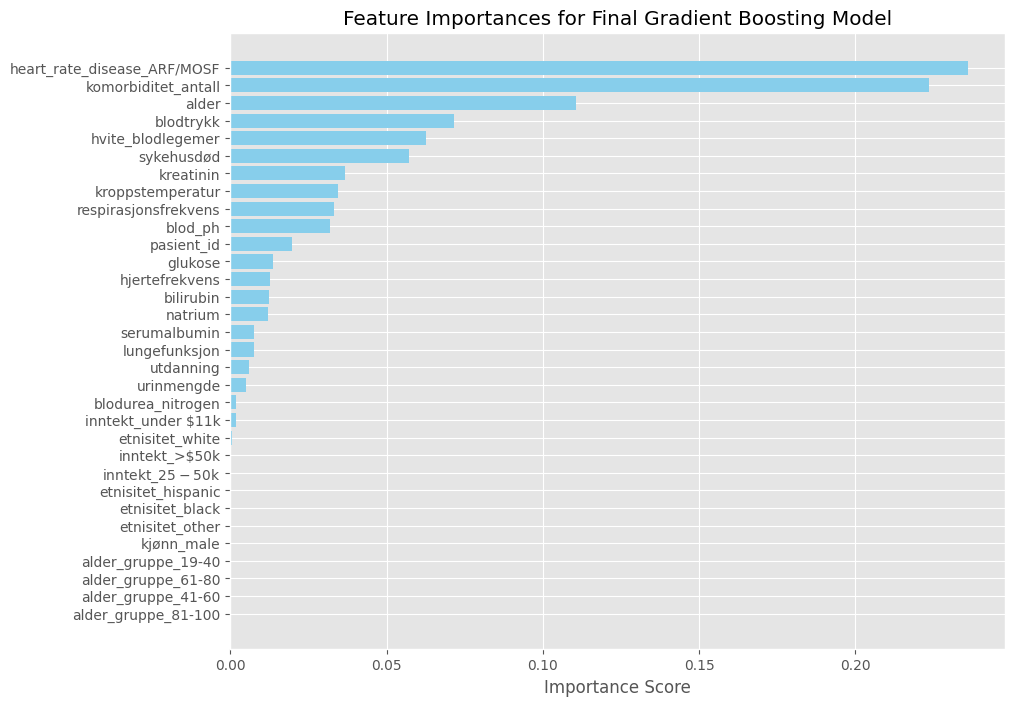

Cross-Validation Performance:
Mean MSE: 394.556278431735
Standard Deviation of MSE: 52.87499000556632
Cross-Validation RMSE: 19.863440750074872


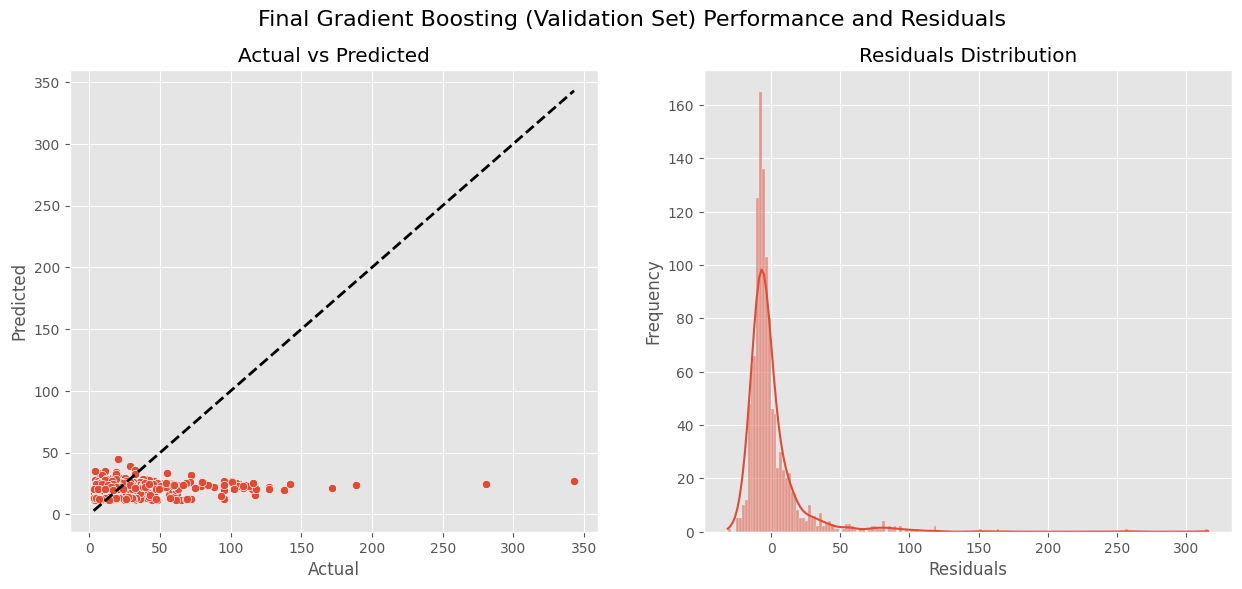

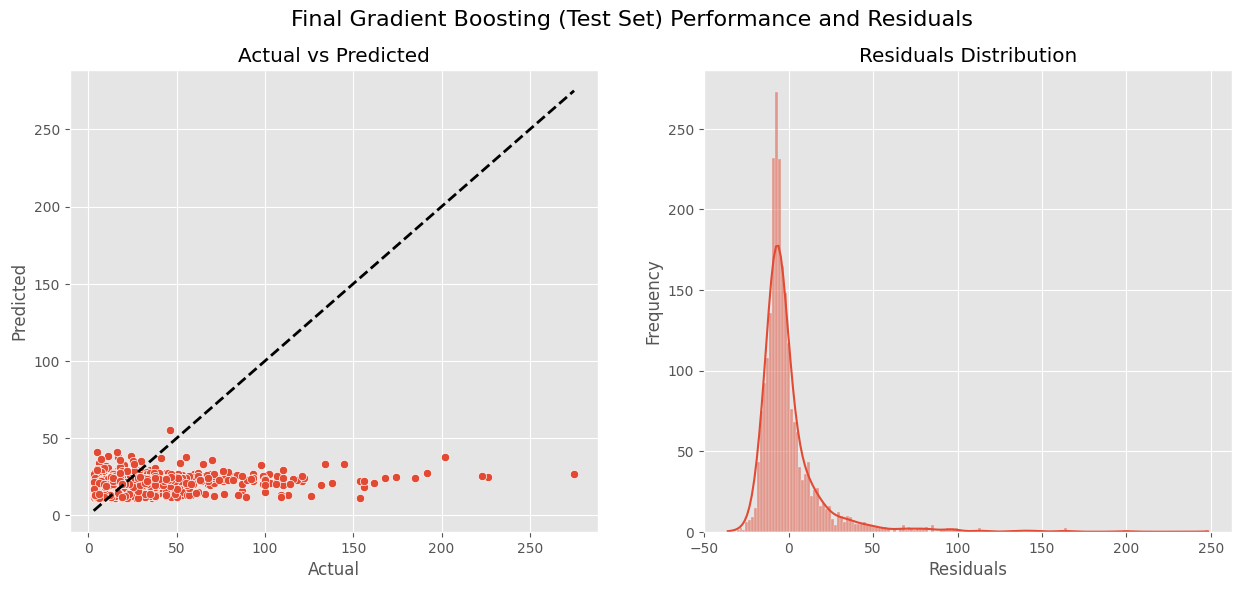

In [16]:
# Initialize the final Gradient Boosting model with the chosen hyperparameters
final_gb_model = GradientBoostingRegressor(
    learning_rate=0.01,
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=200,
    subsample=0.8,
    random_state=42
)

# Train the final model on the training set
final_gb_model.fit(X_train, y_train)

# Validation set performance
y_val_pred = final_gb_model.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Performance:")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")

# Test set performance
y_test_pred = final_gb_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Performance:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")

# Save the final model
joblib.dump(final_gb_model, 'final_gradient_boosting_model.pkl')


# Cross-Validation Performance for Gradient Boosting
cv_scores = cross_val_score(final_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
rmse_cv = np.sqrt(mean_mse)

print("Cross-Validation Performance:")
print(f"Mean MSE: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")
print(f"Cross-Validation RMSE: {rmse_cv}")

# Visualization Function for Model Performance
def plot_model_performance(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'{model_name} Performance and Residuals', fontsize=16)

    # Actual vs Predicted Plot
    sns.scatterplot(x=y_true, y=y_pred, ax=axes[0])
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    axes[0].set_title('Actual vs Predicted')
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')

    # Residuals Plot
    sns.histplot(residuals, kde=True, ax=axes[1])
    axes[1].set_title('Residuals Distribution')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')

    plt.show()

# Visualize model performance on the validation set
plot_model_performance(y_val, y_val_pred, "Final Gradient Boosting (Validation Set)")

# Visualize model performance on the test set
plot_model_performance(y_test, y_test_pred, "Final Gradient Boosting (Test Set)")
